The code in cell below is for generalization
Just enter hashtag and authentication and it will generate map for 1000 tweets
Please check my work below from 3rd cell

[1] "Using direct authentication"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20D.C.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orlando,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=S%C3%A3o%20Paulo/Brasil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=beacon%20hills&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gaga's%20heart&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "Gaga's heart""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kingdom%20of%20Saudi%20Arabia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.8169837,-79.532157&sensor=false
Information from URL : 

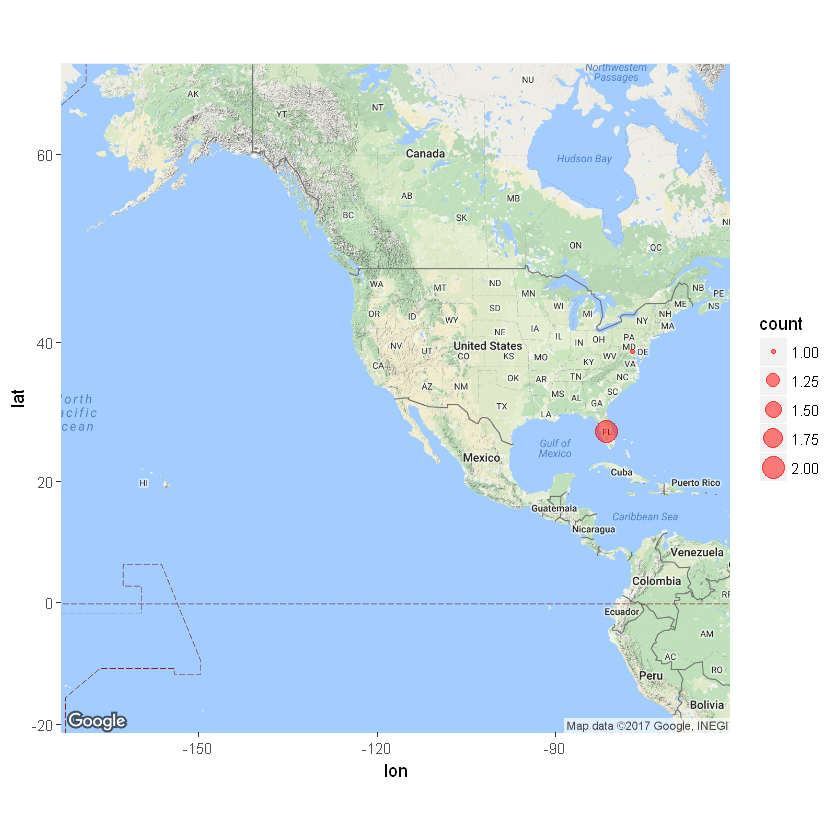

In [6]:
hashtag<-'#ladygaga+#superbowl'
library(twitteR)
twitteR:::setup_twitter_oauth("")
tweets_db<-searchTwitter(hashtag, n=10)
tweets_df<-twListToDF(tweets_db)
usersScreenName <- lookupUsers(tweets_df$screenName, includeNA=FALSE)
usersScreenName_df <- twListToDF(usersScreenName)
library(ggmap)
userLocations <- geocode(usersScreenName_df$location)
userLocations<-subset(userLocations, lon!="")
userStates<-mapply(function(x, y) revgeocode(c(x, y), output = "more"),userLocations$lon, userLocations$lat)
library(data.table)
userStates<-rbindlist(userStates,fill=TRUE)
userStates<-subset(userStates, country=="United States", select=c(administrative_area_level_1))
library(dplyr)
statesWithCount <- summarise(group_by (userStates,administrative_area_level_1), count=n())
statesGeocodes<-geocode(c(as.character(statesWithCount$administrative_area_level_1)))
statesWithGeocodes <- data.frame(statesWithCount[,1:2],statesGeocodes)
USAMAP<-get_map(location = 'state', zoom = 3) 
FinalMap <- ggmap(USAMAP) + geom_point(aes(x = lon, y = lat, size = count), color="red", data = statesWithGeocodes, alpha = .5)
FinalMap

work below is for superbowl topic

importing twitteR library and authenticating and then getting tweets and storing in tweets variable

In [1]:
library(twitteR)

In [2]:
twitteR:::setup_twitter_oauth("")

[1] "Using direct authentication"


In [24]:
tweets<-searchTwitter('#ladygaga+#superbowl', n=20)

Store tweets in database for future use

In [25]:
sql_lite_file=tempfile()

In [26]:
library("RSQLite")

In [27]:
register_sqlite_backend("tweetsData")

In [7]:
store_tweets_db(tweets)

[1] TRUE

load previously stored tweets from database

In [28]:
tweets_db=load_tweets_db()

In [11]:
length(tweets_db)

[1] 22020

convert list to data frame

In [29]:
tweets_df<-twListToDF(tweets_db)

In [13]:
head(tweets_df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @TNTLA: #LadyGaga lo logró: Grabar un disco <ed><U+00A0><U+00BD><ed><U+00B2><U+00BF> <U+2714><U+FE0F> Tocar en el #SuperBowl <ed><U+00A0><U+00BC><ed><U+00BF><U+0088> <U+2714> Transformar a #Metallica en #MetalliGA <U+2714> #GrammysEnTNT https…,FALSE,0,NA,2017-02-13 05:20:15,FALSE,NA,831010070993330176,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Norzagaray,973,FALSE,FALSE,NA,NA
RT @TNTLA: #LadyGaga lo logró: Grabar un disco <ed><U+00A0><U+00BD><ed><U+00B2><U+00BF> <U+2714><U+FE0F> Tocar en el #SuperBowl <ed><U+00A0><U+00BC><ed><U+00BF><U+0088> <U+2714> Transformar a #Metallica en #MetalliGA <U+2714> #GrammysEnTNT https…,FALSE,0,NA,2017-02-13 05:19:34,FALSE,NA,831009902680092672,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",girlTRANSEXUAL,973,FALSE,FALSE,NA,NA
RT @OzzyManReviews: Me commentary on #LadyGaga's #Superbowl performance can be seen on me YouTube channel: https://t.co/AT3HKSHkBi #sport #…,FALSE,0,NA,2017-02-13 05:16:22,FALSE,NA,831009097109561344,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",ricoalonzo,100,FALSE,FALSE,NA,NA
"RT @NEWSTALK1010: After her #SuperBowl performance, #LadyGaga has announced a world tour with a stop in Toronto at the ACC Sept 6. Tickets…",FALSE,0,NA,2017-02-13 05:12:17,FALSE,NA,831008067953139712,NA,"<a href=""http://www.github.com/lashgar"" rel=""nofollow"">yyznowseries</a>",nowyyz,20,FALSE,FALSE,NA,NA
RT @tuaminomemandas: @Esepinchewey #ladygaga arruinó el medio tiempo del #SuperBowl ahora arruina los #Grammys que sigue? La inauguración d…,FALSE,0,NA,2017-02-13 05:11:10,FALSE,NA,831007785538162688,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",marchvillanueva,3,FALSE,FALSE,NA,NA
RT @gagamvx: GOOD LUCK GAGA #LadyGaga #PepsiHalftime #SuperBowl https://t.co/HmcbpixIB5,FALSE,0,NA,2017-02-13 05:11:01,FALSE,NA,831007748825415680,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",CoCHINOswag,2394,FALSE,FALSE,NA,NA


In [4]:
library(ggmap)

Loading required package: ggplot2


getting list of users of each tweets from tweets dataframe and convert it to dataframe

In [33]:
usersScreenName <- lookupUsers(tweets_df$screenName, includeNA=FALSE)

In [34]:
usersScreenName_df <- twListToDF(usersScreenName)

getting locations of each user using geocode() which uses google api from library ggmap

In [37]:
userLocations <- geocode(usersScreenName_df$location)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paris%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brasil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=God's%20World&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tokyo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cambrai,%20Nord-Pas-de-Calais&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto.NYC.the%20Universe&sensor=false
Warning message:
"geocod

saving locations in csv file for future use

In [38]:
write.csv(userLocations, file = "temp_file.csv")

reading locations from previously saved csv file

In [15]:
userLocations <- read.csv(file="locations",head=TRUE,sep=",")

removing loactions with null value those of users whose locations are not available

In [16]:
userLocations<-subset(userLocations, lon!="")

locations is data frame with columns longitude and latitude

In [17]:
head(userLocations)

,X,lon,lat
3,3,-74.0059413,40.71278
7,7,2.3522219,48.85661
9,9,-0.1277583,51.50735
10,10,-122.4194155,37.77493
11,11,-51.9252800,-14.23500
12,12,-83.1799170,42.43083


using revgeocode to get location details of each longitude and latitude combination

In [18]:
userStates<-mapply(function(x, y) revgeocode(c(x, y), output = "more"),userLocations$lon, userLocations$lat)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=48.856614,2.3522219&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=51.5073509,-0.1277583&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.7749295,-122.4194155&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=-14.235004,-51.92528&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.430834,-83.179917&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.6894875,139.6917064&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=50.173538,3.236633&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=55.378051,-3

importing data.table library to store key value pair datastructure

In [3]:
library(data.table)

converting states variable to proper format to get subset from it and then getting state name which is under field administrative_area_level_1 by restricting country to united states 

In [46]:
userStates<-rbindlist(userStates,fill=TRUE)

In [47]:
userStates<-subset(userStates, country=="United States", select=c(administrative_area_level_1))

saving states of each user in csv file to future use

In [48]:
write.csv(userStates, file = "states_df_temp_file.csv")

reading previously stored csv file of states of each user

In [5]:
address <- read.csv(file="states_df.csv",head=TRUE,sep=",")

importing dplyr library for counting frequency of each each state using group_by() function and setting field names to State and Count

In [6]:
library(dplyr)

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:twitteR':

    id, location

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
statesWithCount <- summarise(group_by (address,administrative_area_level_1), count=n())

this is how state_count will be state and its count

In [8]:
head(statesWithCount)

administrative_area_level_1,count
Alabama,10
Alaska,1
Arizona,17
Arkansas,7
California,181
Colorado,16


creating states list as character and getting geocodes of each state because we need it to plot on map

In [9]:
statesGeocodes<-geocode(c(as.character(statesWithCount$administrative_area_level_1)))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Alabama&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Alaska&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arkansas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colorado&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Connecticut&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Delaware&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=District%20of%20Columbia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocod

appending geocode of each state to each state and count

In [10]:
statesWithGeocodes <- data.frame(statesWithCount[,1:2],statesGeocodes)

The final data frame will look like this

In [11]:
head(statesWithGeocodes)

administrative_area_level_1,count,lon,lat
Alabama,10,-86.90230,32.31823
Alaska,1,-149.49367,64.20084
Arizona,17,-111.09373,34.04893
Arkansas,7,-91.83183,35.20105
California,181,-119.41793,36.77826
Colorado,16,-105.78207,39.55005


Getting map of usa in us_state_map
adding various background and axis
adding points of each state with size according to count

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=state&zoom=3&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=state&sensor=false


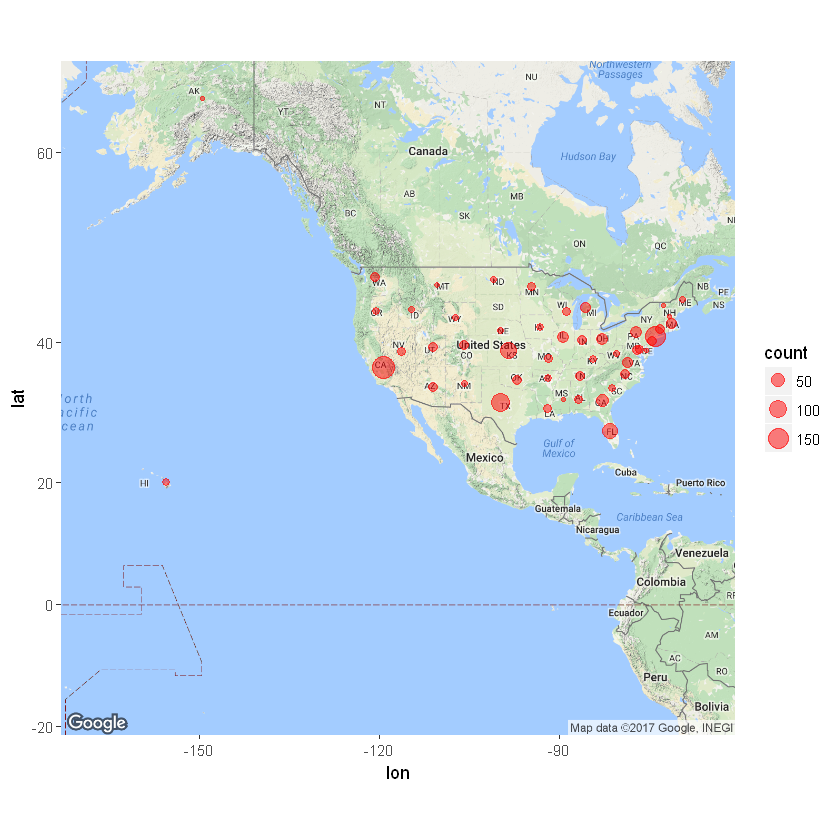

In [12]:
USAMAP<-get_map(location = 'state', zoom = 3) 
FinalMap <- ggmap(USAMAP) + geom_point(aes(x = lon, y = lat, size = count), color="red", data = statesWithGeocodes, alpha = .5)
FinalMap